# 区间可行性分布趋势与结构展示


本实验 Notebook 按分布类型展示参数变化下的价格区间可行性结构。  
每个分布模块包含：
1. 参数扫描趋势图（Feasibility Trend）
2. 典型参数下的热力图展示
3. 每个热图后的结构分析输出


In [5]:

import numpy as np
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from algorithms.market import Market
from experiments.feasibility_grid import generate_feasibility_grid
from utils.market_generator import MarketGenerator
from utils.feasibility_analysis import analyze_feasibility_matrix
from utils.visualization import plot_feasibility_heatmap, plot_feasibility_trend


## 🔹 分布一：截断正态分布 (μ=5, σ ∈ [0.5, 3.0])

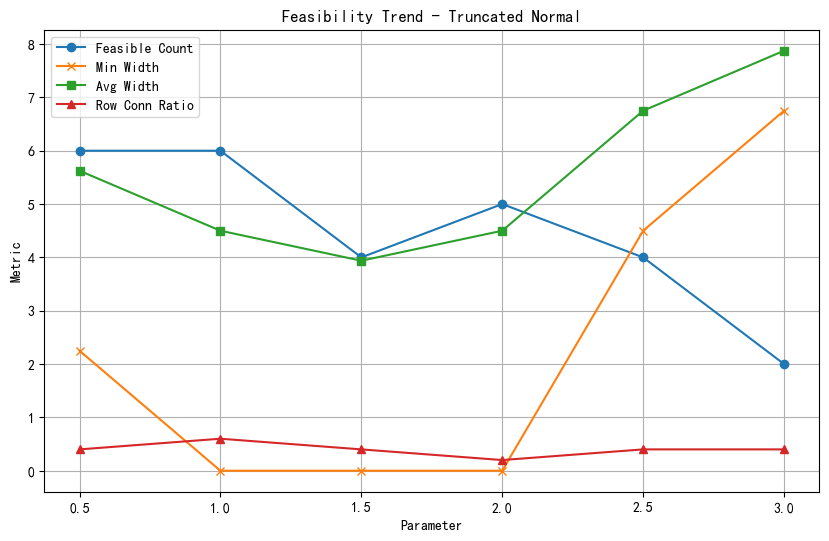

In [21]:

sigmas = np.linspace(0.5, 3.0, 6)
results = []

# 参数趋势数据收集
for sigma in sigmas:
    values, masses = MarketGenerator.truncated_normal(mu=5, sigma=sigma, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
    results.append(metrics)

# 趋势图绘制
plot_feasibility_trend(sigmas, results, title="Feasibility Trend - Truncated Normal")



▶️ 热图展示：σ = 0.5
✅ 可行区间数量: 6
📏 最小宽度: 2.250, 平均宽度: 5.625
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.40

▶️ 热图展示：σ = 1.5
✅ 可行区间数量: 4
📏 最小宽度: 0.000, 平均宽度: 3.938
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.40

▶️ 热图展示：σ = 3.0
✅ 可行区间数量: 2
📏 最小宽度: 6.750, 平均宽度: 7.875
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.40


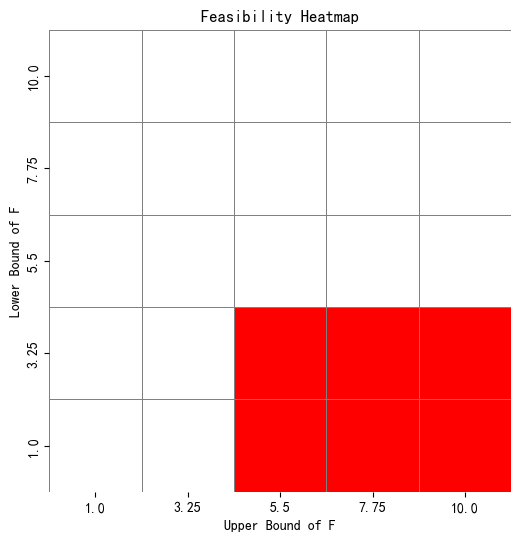

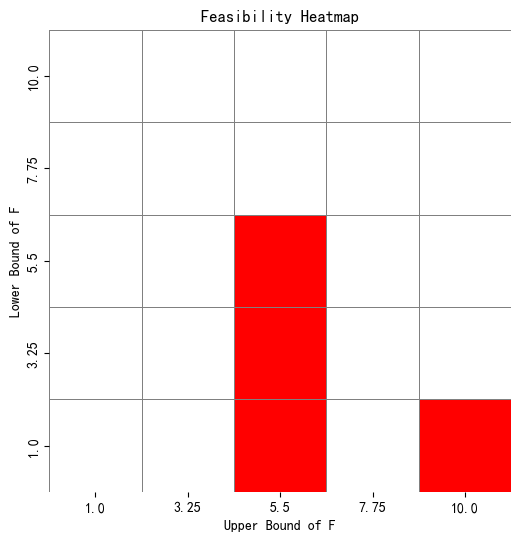

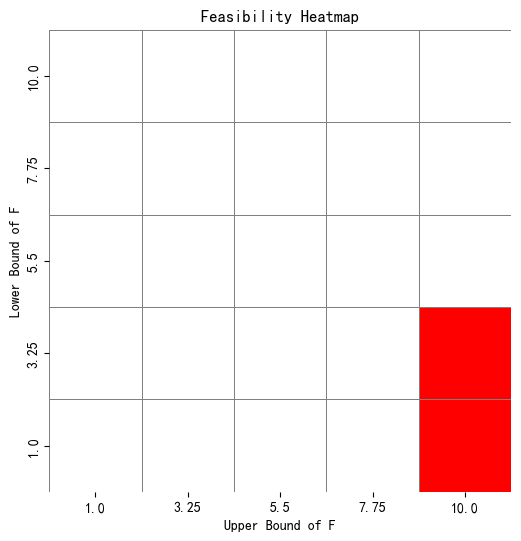

In [22]:

for sigma in [0.5, 1.5, 3.0]:
    print(f"\n▶️ 热图展示：σ = {sigma}")
    values, masses = MarketGenerator.truncated_normal(mu=5, sigma=sigma, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)
    analyze_feasibility_matrix(values, matrix)


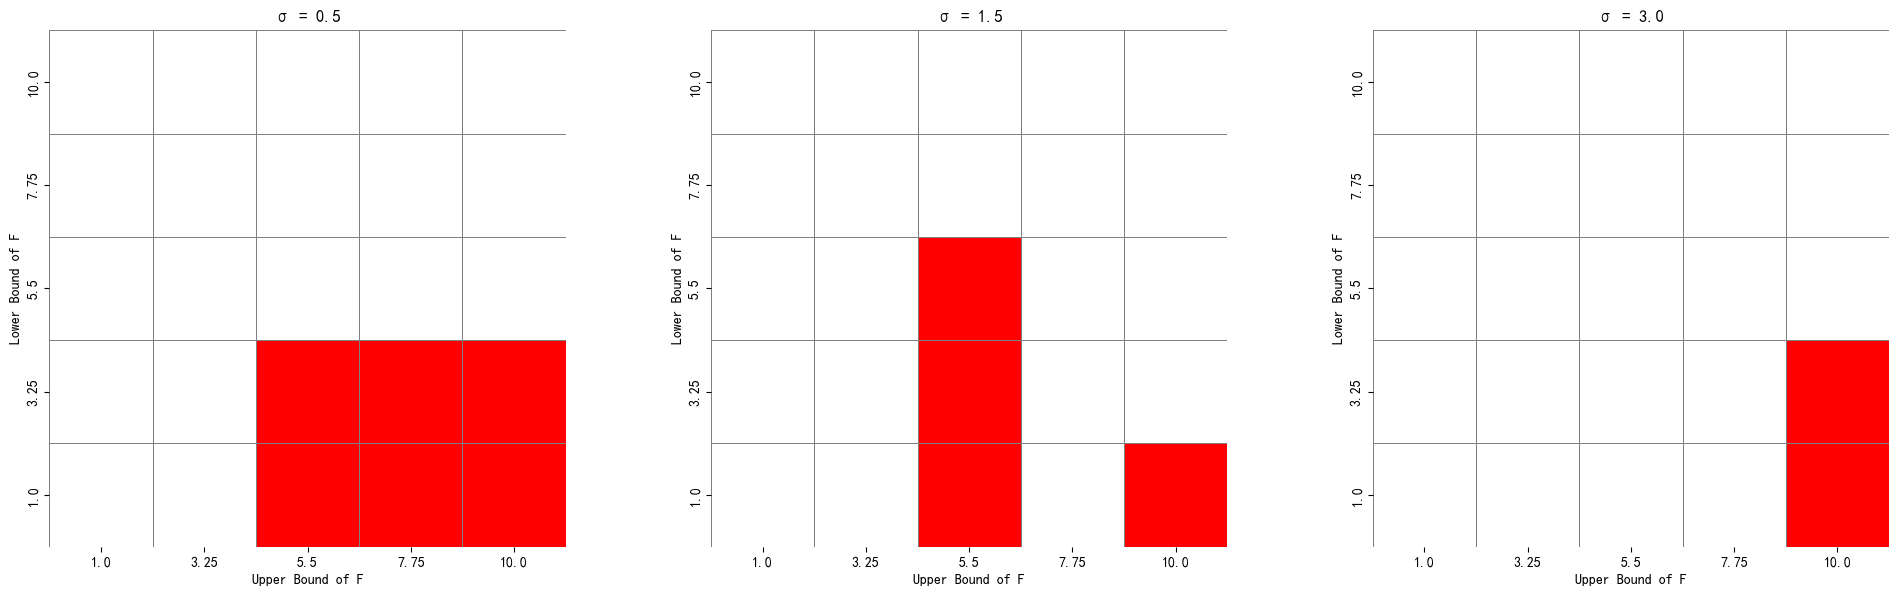

In [24]:
import matplotlib.pyplot as plt
# 创建一个含有3个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, sigma in enumerate([0.5, 1.5, 3.0]):
    # 使用MarketGenerator.truncated_normal方法
    values, masses = MarketGenerator.truncated_normal(mu=5, sigma=sigma, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    # 调用函数绘制热图，传入axes[i]和正确的标题
    plot_feasibility_heatmap(values, matrix, title=f"σ = {sigma}", ax=axes[i])

plt.tight_layout()
plt.show()

## 🔹 分布二：幂律分布 (α ∈ [1.5, 3.0])

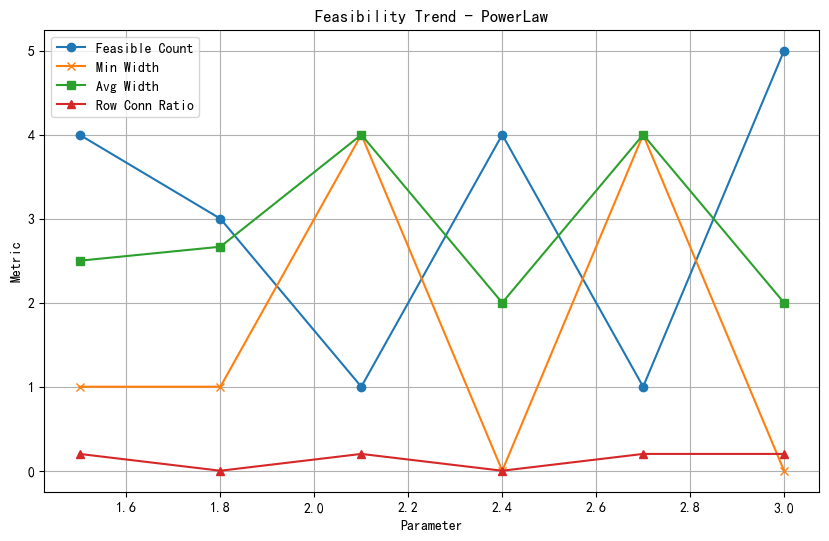

In [28]:

alphas = np.linspace(1.5, 3.0, 6)
results = []

for alpha in alphas:
    values, masses = MarketGenerator.powerlaw(alpha=alpha, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
    results.append(metrics)

plot_feasibility_trend(alphas, results, title="Feasibility Trend - PowerLaw")



▶️ 热图展示：α = 1.5


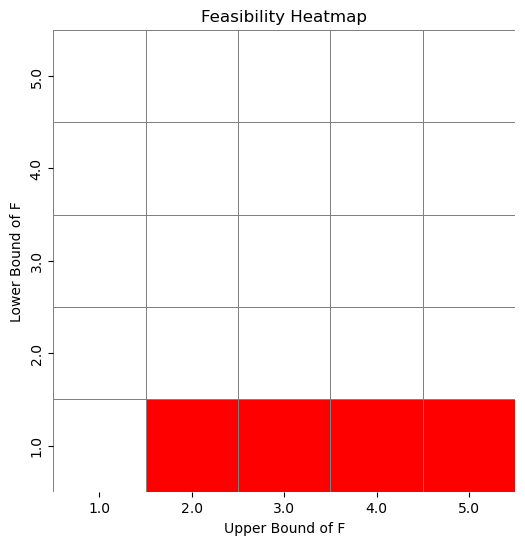

✅ 可行区间数量: 4
📏 最小宽度: 1.000, 平均宽度: 2.500
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.20

▶️ 热图展示：α = 2.0


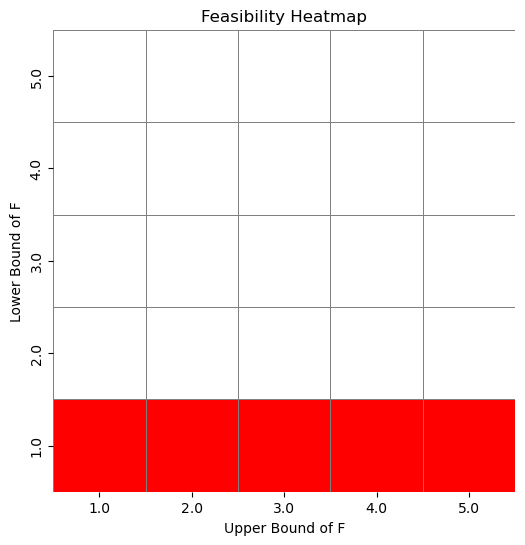

✅ 可行区间数量: 5
📏 最小宽度: 0.000, 平均宽度: 2.000
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.20

▶️ 热图展示：α = 3.0


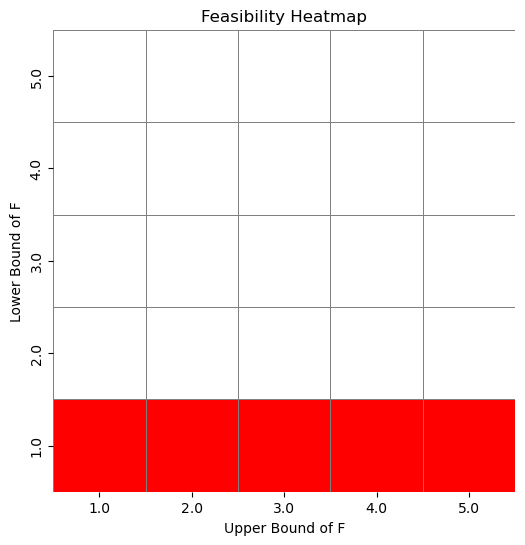

✅ 可行区间数量: 5
📏 最小宽度: 0.000, 平均宽度: 2.000
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.20


In [5]:

for alpha in [1.5, 2.0, 3.0]:
    print(f"\n▶️ 热图展示：α = {alpha}")
    values, masses = MarketGenerator.powerlaw(alpha=alpha, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)
    analyze_feasibility_matrix(values, matrix)


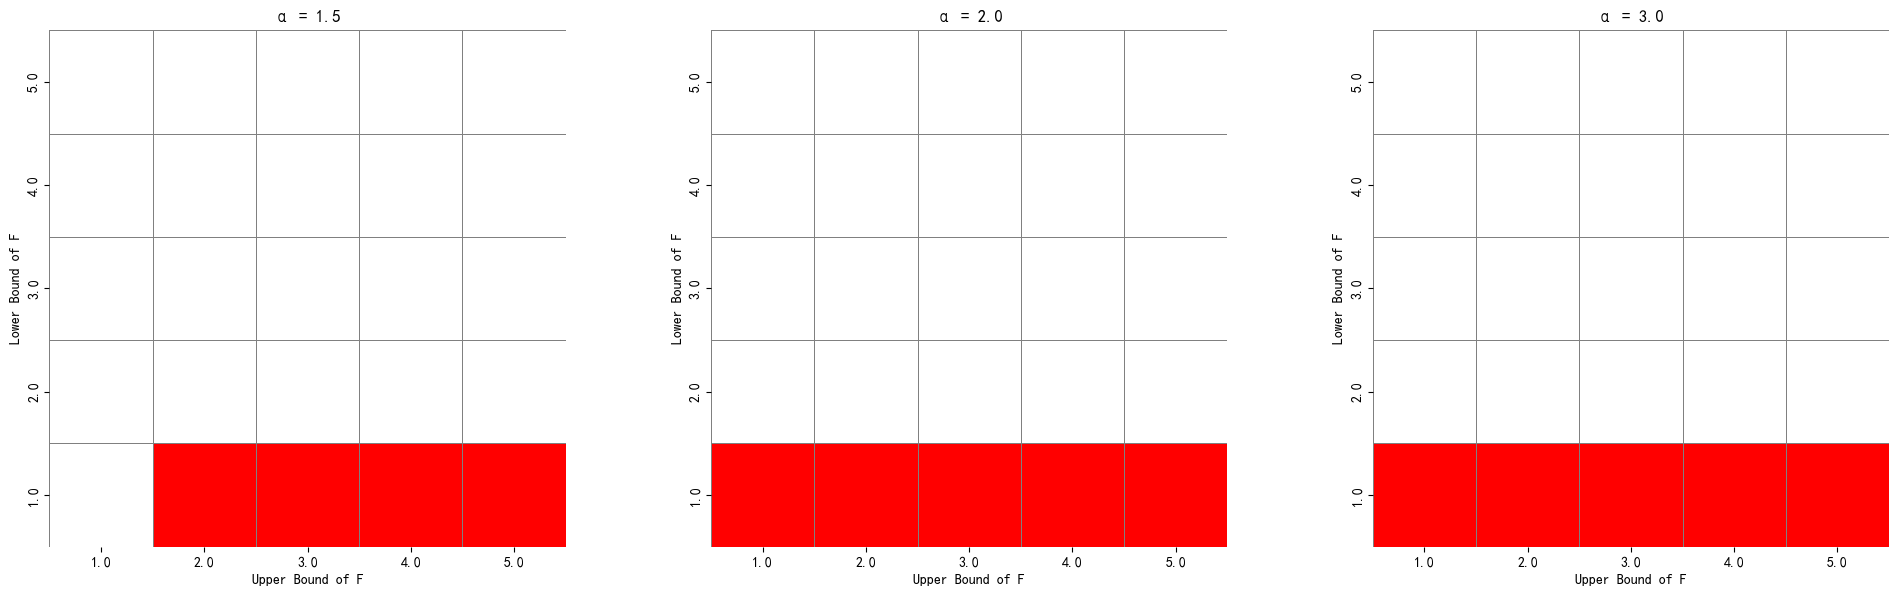

In [29]:
import matplotlib.pyplot as plt
# 创建一个含有3个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, alpha in enumerate([1.5, 2.0, 3.0]):
    # 使用MarketGenerator.powerlaw方法
    values, masses = MarketGenerator.powerlaw(alpha=alpha, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    # 调用函数绘制热图，传入axes[i]和正确的标题
    plot_feasibility_heatmap(values, matrix, title=f"α = {alpha}", ax=axes[i])

plt.tight_layout()
plt.show()

## 🔹 分布三：二项型分布 (p ∈ [0.1, 0.9])

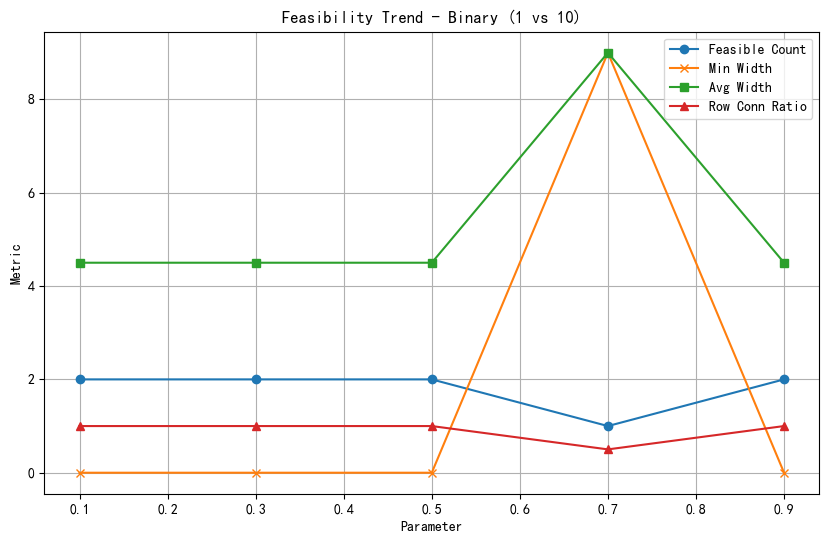

In [11]:

ps = np.linspace(0.1, 0.9, 5)
results = []

for p in ps:
    values, masses = MarketGenerator.binary(p=p, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
    results.append(metrics)

plot_feasibility_trend(ps, results, title="Feasibility Trend - Binary (1 vs 10)")



▶️ 热图展示：p = 0.1
✅ 可行区间数量: 2
📏 最小宽度: 0.000, 平均宽度: 4.500
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 1.00

▶️ 热图展示：p = 0.5
✅ 可行区间数量: 2
📏 最小宽度: 0.000, 平均宽度: 4.500
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 1.00

▶️ 热图展示：p = 0.9
✅ 可行区间数量: 2
📏 最小宽度: 0.000, 平均宽度: 4.500
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 1.00


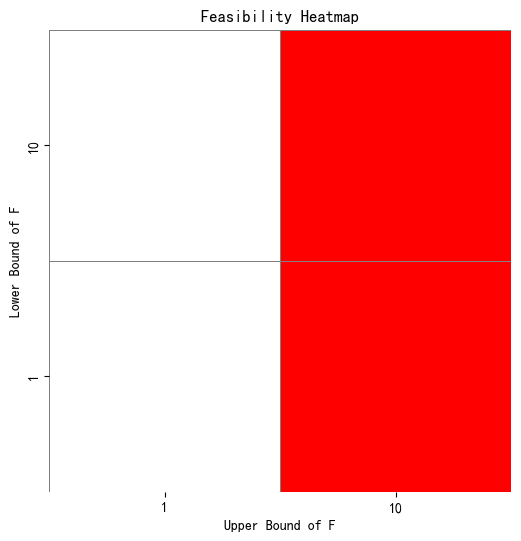

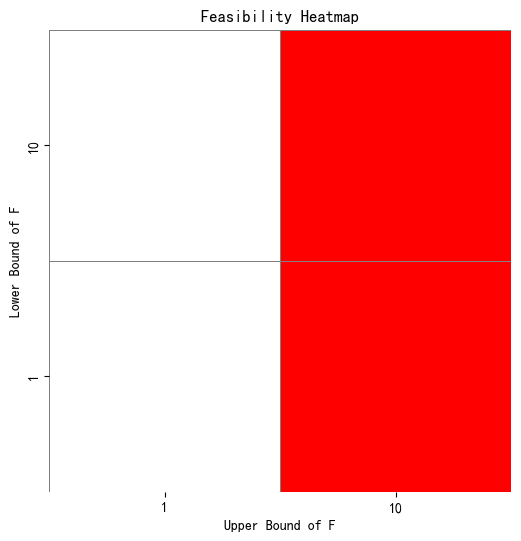

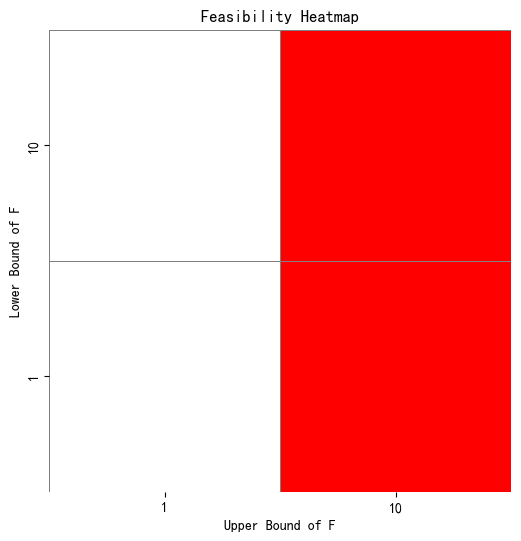

In [12]:

for p in [0.1, 0.5, 0.9]:
    print(f"\n▶️ 热图展示：p = {p}")
    values, masses = MarketGenerator.binary(p=p, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)
    analyze_feasibility_matrix(values, matrix)


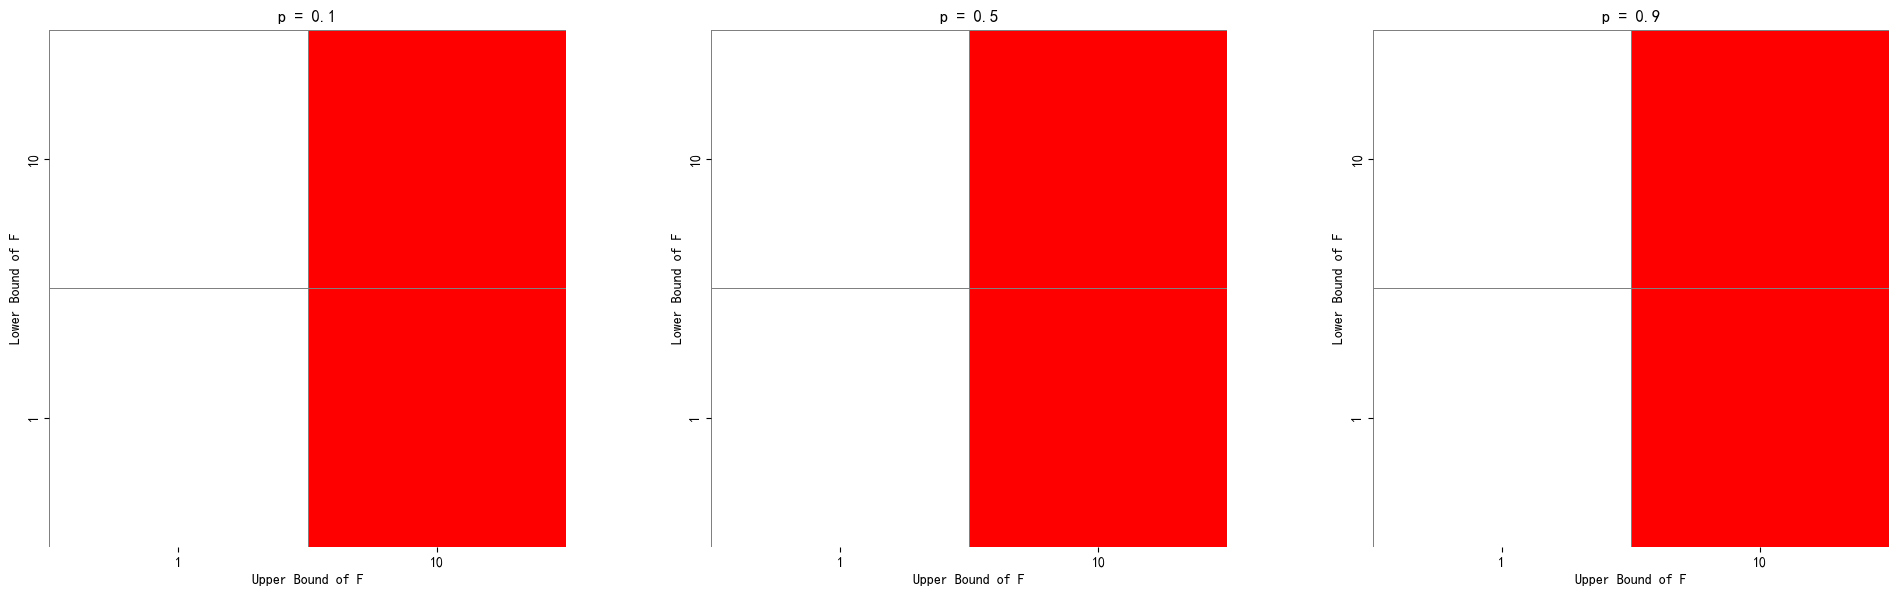

In [16]:
import matplotlib.pyplot as plt
# 创建一个含有3个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, p in enumerate([0.1, 0.5, 0.9]):
    # 使用MarketGenerator.binary而不是uniform
    values, masses = MarketGenerator.binary(p=p, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    # 调用函数绘制热图，传入axes[i]和正确的标题
    plot_feasibility_heatmap(values, matrix, title=f"p = {p}", ax=axes[i])

plt.tight_layout()
plt.show()

## 🔹 分布四：双峰分布 (权重 ∈ [0.2, 0.8])

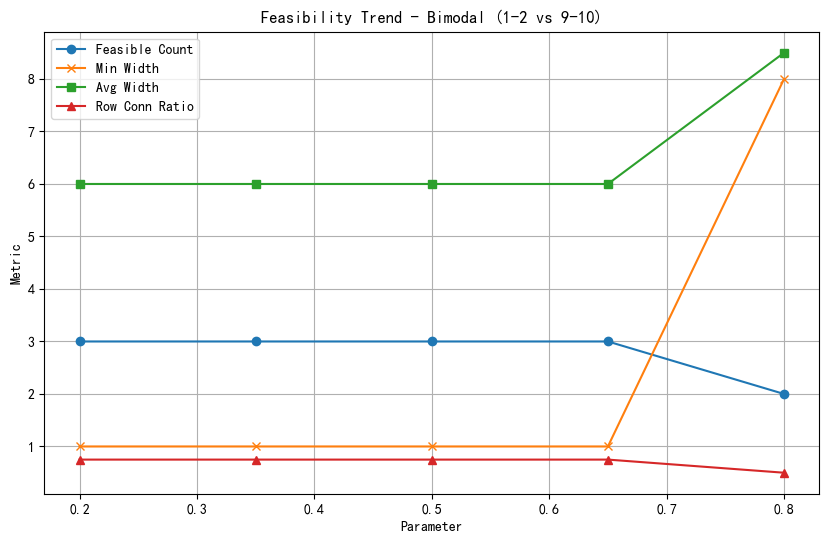

In [25]:

weights = np.linspace(0.2, 0.8, 5)
results = []

for w in weights:
    values, masses = MarketGenerator.bimodal([1, 2], [9, 10], weight=w)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
    results.append(metrics)

plot_feasibility_trend(weights, results, title="Feasibility Trend - Bimodal (1-2 vs 9-10)")



▶️ 热图展示：双峰权重 = 0.2


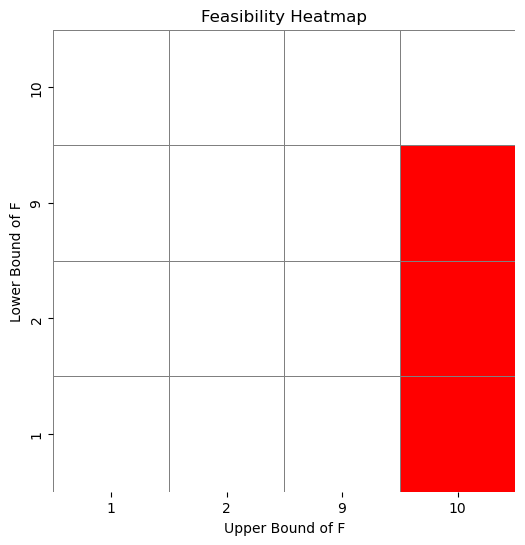

✅ 可行区间数量: 3
📏 最小宽度: 1.000, 平均宽度: 6.000
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.75

▶️ 热图展示：双峰权重 = 0.5


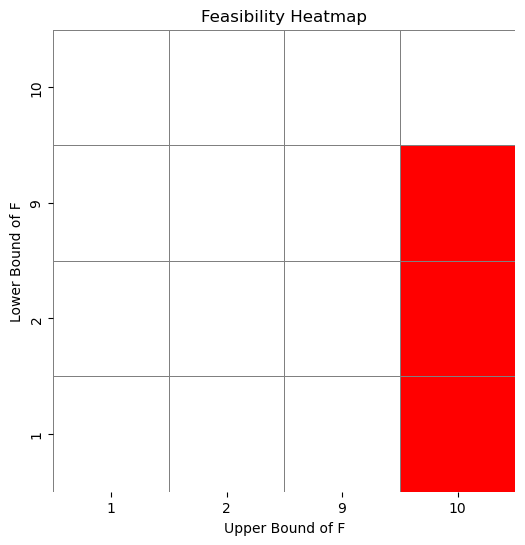

✅ 可行区间数量: 3
📏 最小宽度: 1.000, 平均宽度: 6.000
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.75

▶️ 热图展示：双峰权重 = 0.8


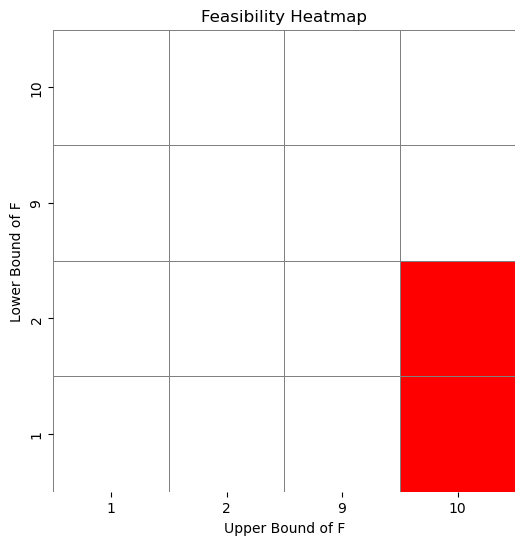

✅ 可行区间数量: 2
📏 最小宽度: 8.000, 平均宽度: 8.500
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.50


In [9]:

for w in [0.2, 0.5, 0.8]:
    print(f"\n▶️ 热图展示：双峰权重 = {w}")
    values, masses = MarketGenerator.bimodal([1, 2], [9, 10], weight=w)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)
    analyze_feasibility_matrix(values, matrix)


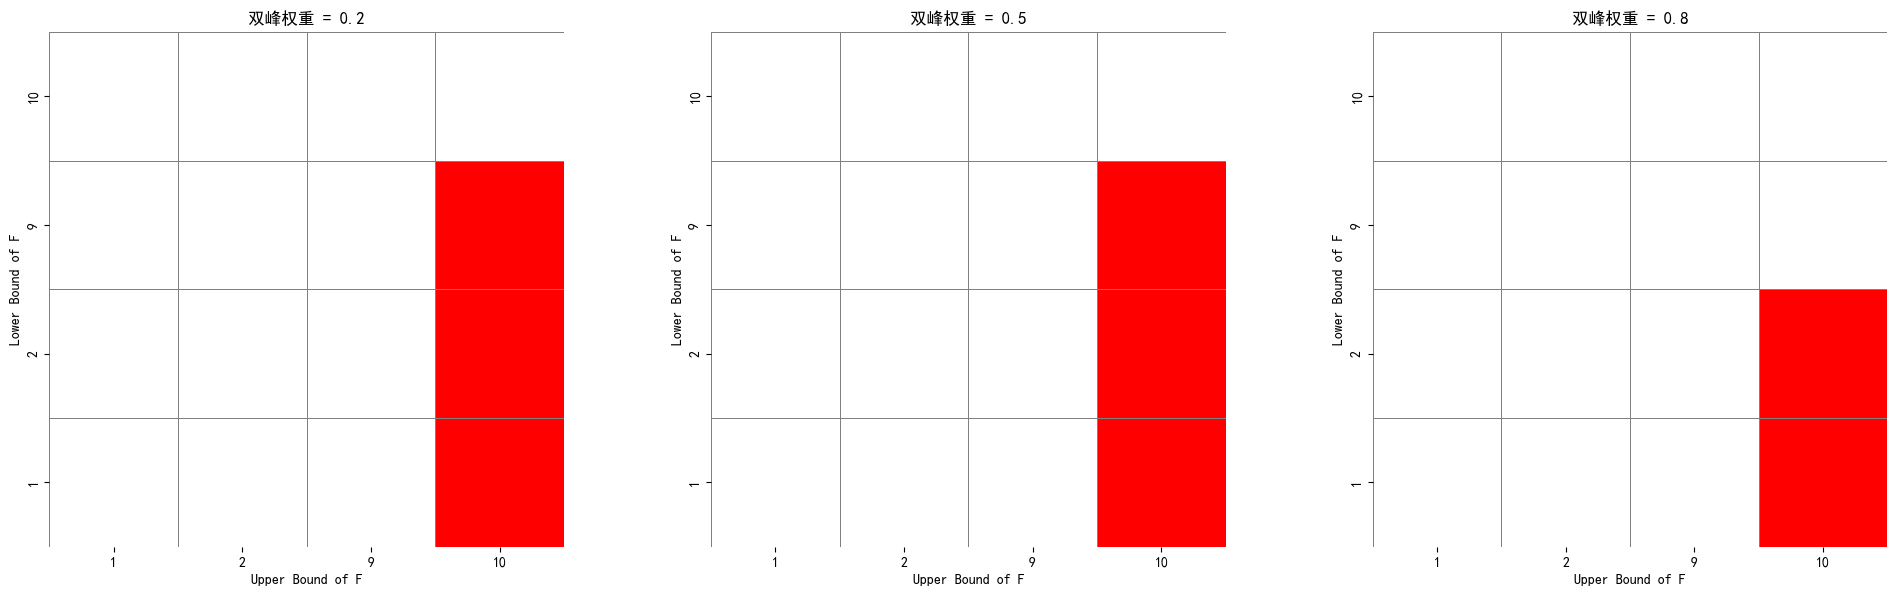

In [27]:
import matplotlib.pyplot as plt
# 创建一个含有3个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, w in enumerate([0.2, 0.5, 0.8]):
    # 使用MarketGenerator.bimodal方法
    values, masses = MarketGenerator.bimodal([1, 2], [9, 10], weight=w)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    # 调用函数绘制热图，传入axes[i]和正确的标题
    plot_feasibility_heatmap(values, matrix, title=f"双峰权重 = {w}", ax=axes[i])

plt.tight_layout()
plt.show()

## 🔹 分布五：几何分布 (q ∈ [0.2, 0.8])

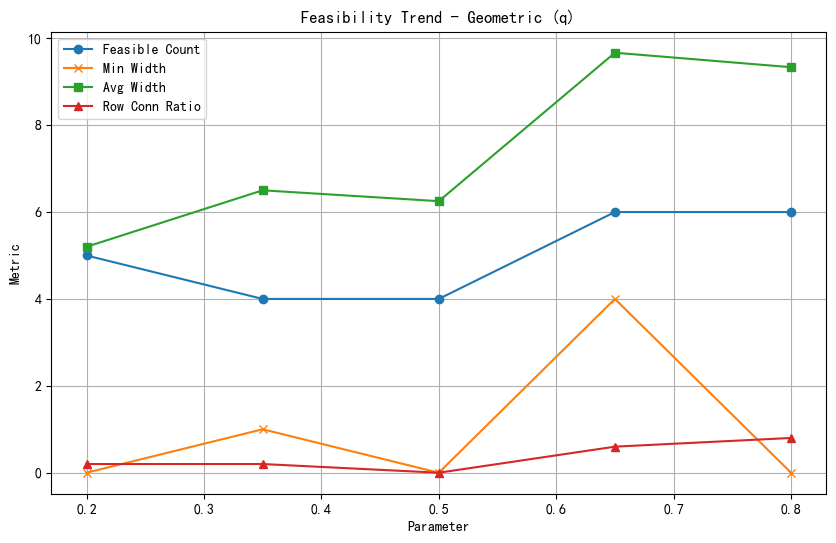

In [17]:

qs = np.linspace(0.2, 0.8, 5)
results = []

for q in qs:
    values, masses = MarketGenerator.geometric(q=q, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
    results.append(metrics)

plot_feasibility_trend(qs, results, title="Feasibility Trend - Geometric (q)")



▶️ 热图展示：q = 0.2
✅ 可行区间数量: 5
📏 最小宽度: 0.000, 平均宽度: 5.200
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.20

▶️ 热图展示：q = 0.5
✅ 可行区间数量: 4
📏 最小宽度: 0.000, 平均宽度: 6.250
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.00

▶️ 热图展示：q = 0.8
✅ 可行区间数量: 6
📏 最小宽度: 0.000, 平均宽度: 9.333
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.80


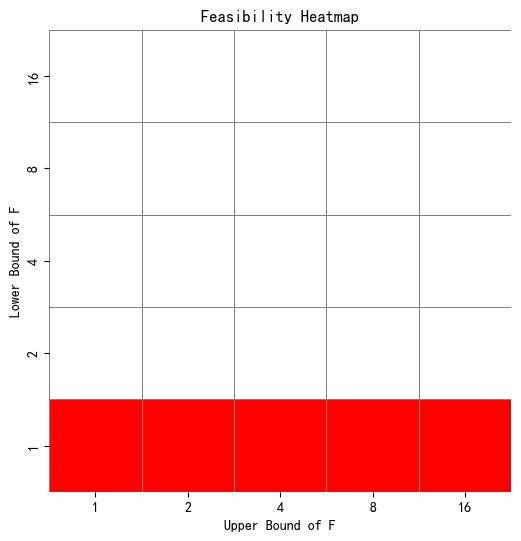

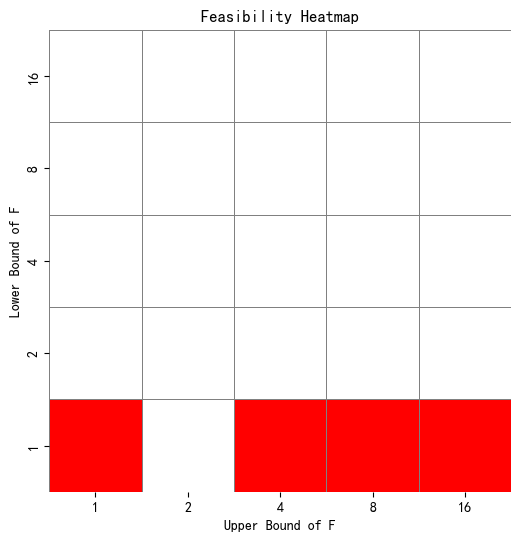

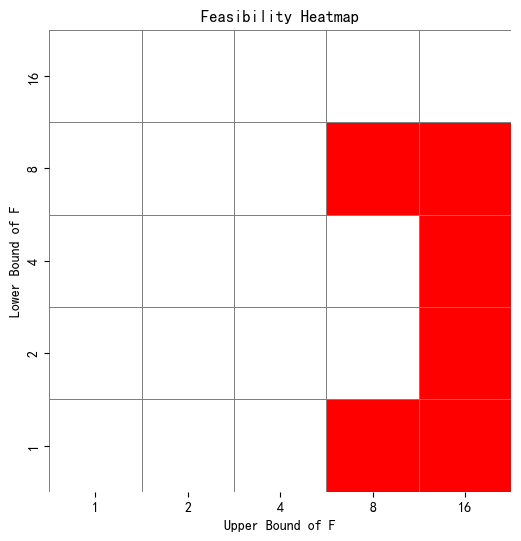

In [18]:

for q in [0.2, 0.5, 0.8]:
    print(f"\n▶️ 热图展示：q = {q}")
    values, masses = MarketGenerator.geometric(q=q, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)
    analyze_feasibility_matrix(values, matrix)


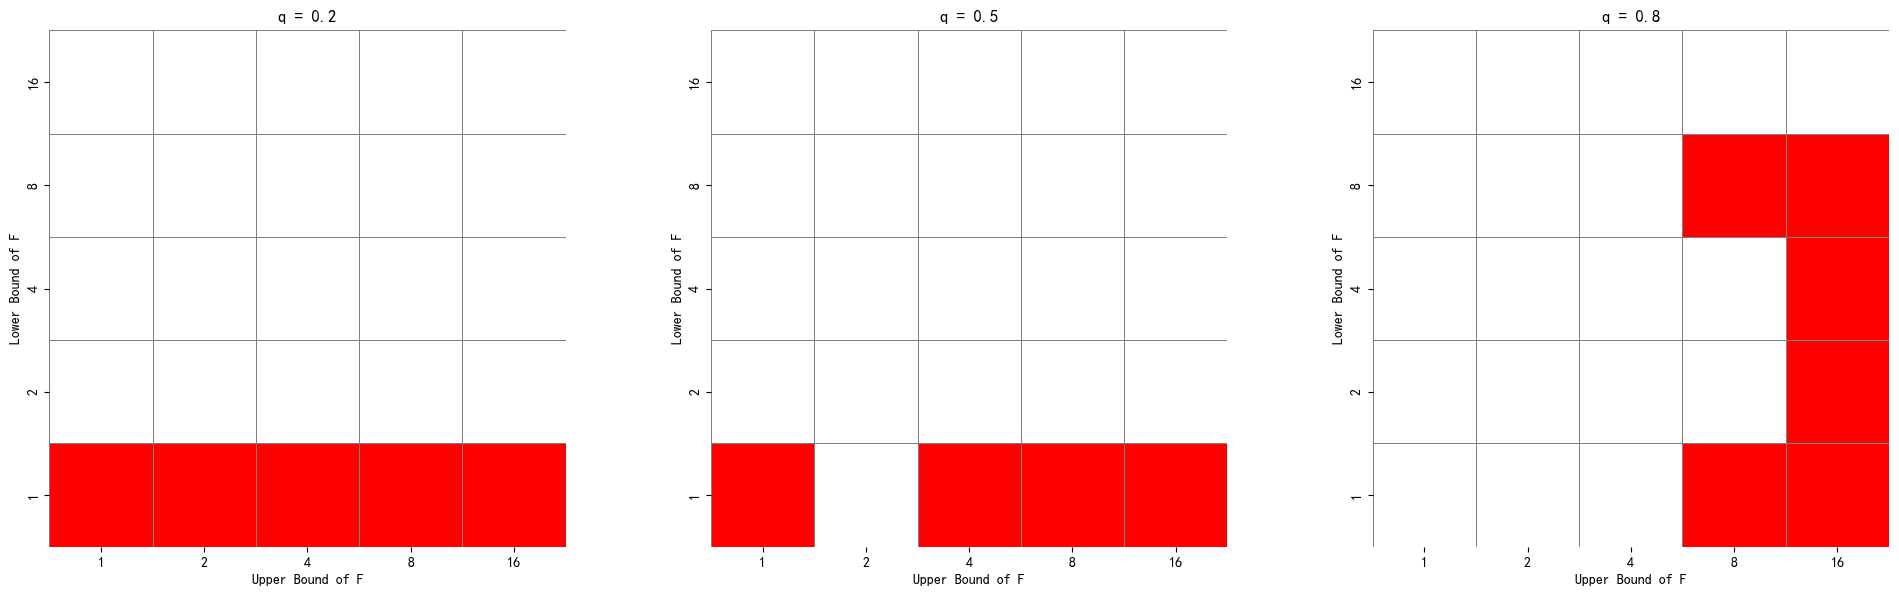

In [20]:
import matplotlib.pyplot as plt
# 创建一个含有3个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, q in enumerate([0.2, 0.5, 0.8]):
    # 使用MarketGenerator.geometric方法
    values, masses = MarketGenerator.geometric(q=q, n=5)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    # 调用函数绘制热图，传入axes[i]和正确的标题
    plot_feasibility_heatmap(values, matrix, title=f"q = {q}", ax=axes[i])

plt.tight_layout()
plt.show()

## 🔹 分布六：均匀分布 (n = 3, 5, 7, 9)

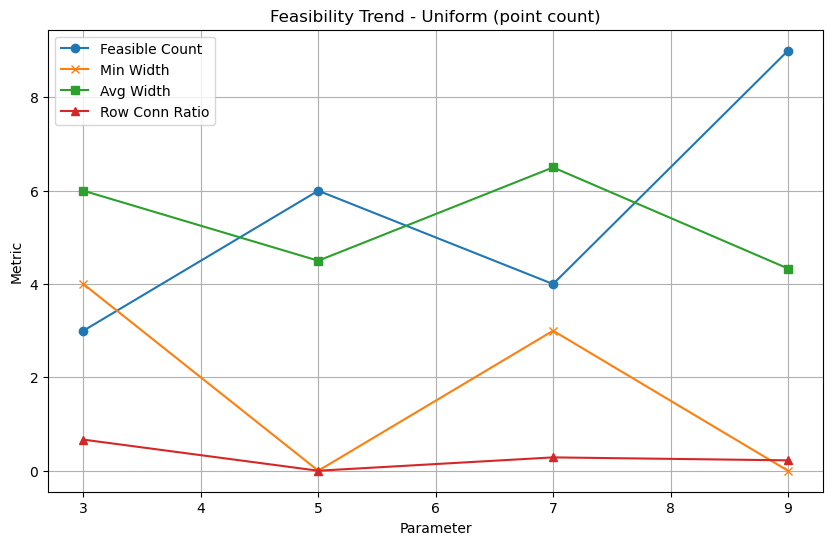

In [12]:

ns = [3, 5, 7, 9]
results = []

for n in ns:
    values, masses = MarketGenerator.uniform(n=n, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
    results.append(metrics)

plot_feasibility_trend(ns, results, title="Feasibility Trend - Uniform (point count)")



▶️ 热图展示：n = 3


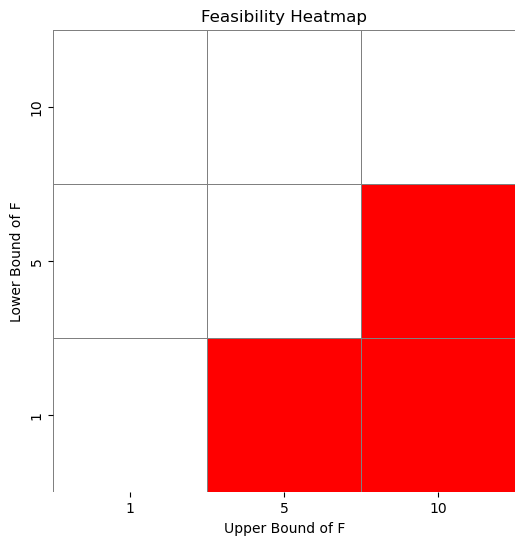

✅ 可行区间数量: 3
📏 最小宽度: 4.000, 平均宽度: 6.000
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.67

▶️ 热图展示：n = 5


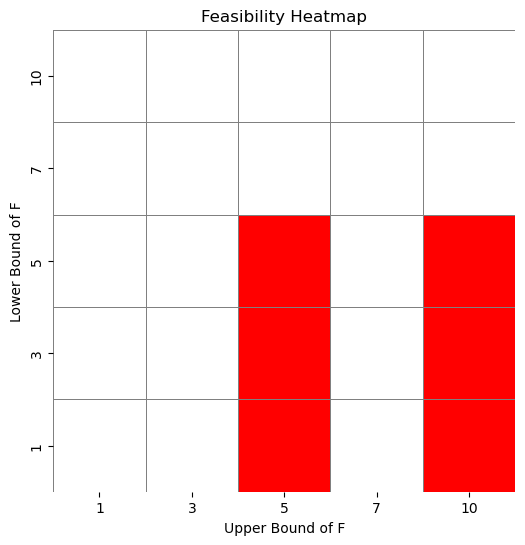

✅ 可行区间数量: 6
📏 最小宽度: 0.000, 平均宽度: 4.500
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.00

▶️ 热图展示：n = 9


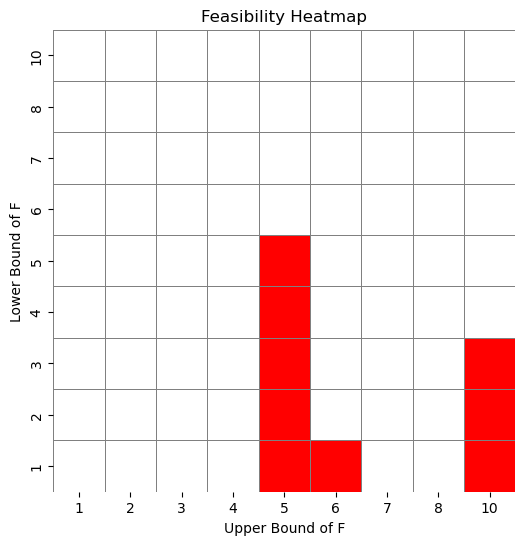

✅ 可行区间数量: 9
📏 最小宽度: 0.000, 平均宽度: 4.333
🎯 是否包含统一最优价格: 是
🔗 行连通性比例: 0.22


In [13]:

for n in [3, 5, 9]:
    print(f"\n▶️ 热图展示：n = {n}")
    values, masses = MarketGenerator.uniform(n=n, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)
    analyze_feasibility_matrix(values, matrix)


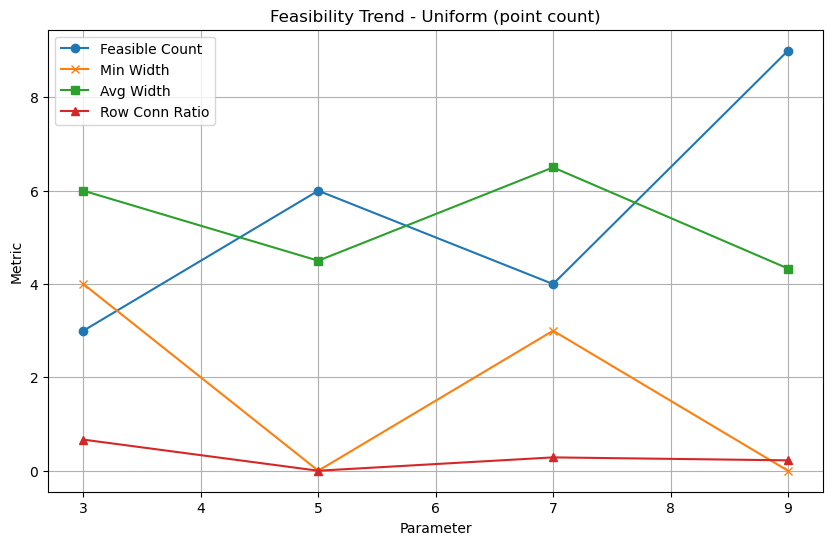

In [2]:
ns = [3, 5, 7, 9]
results = []

for n in ns:
    values, masses = MarketGenerator.uniform(n=n, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    metrics = analyze_feasibility_matrix(values, matrix, verbose=False)
    results.append(metrics)

plot_feasibility_trend(ns, results, title="Feasibility Trend - Uniform (point count)")


▶️ 热图展示：n = 3

▶️ 热图展示：n = 5

▶️ 热图展示：n = 9


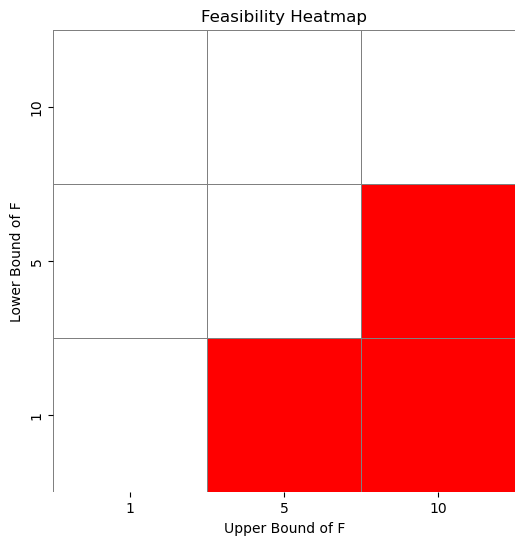

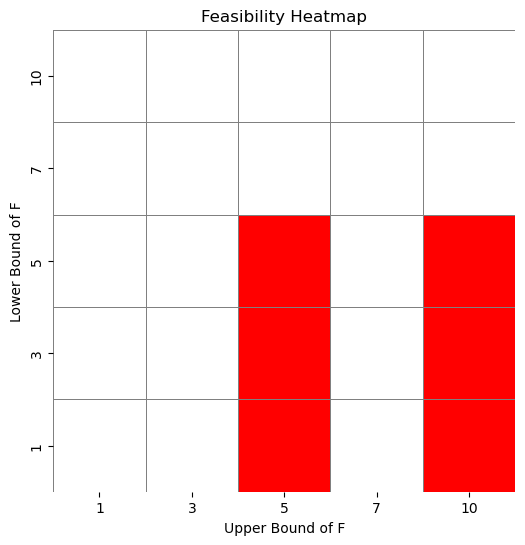

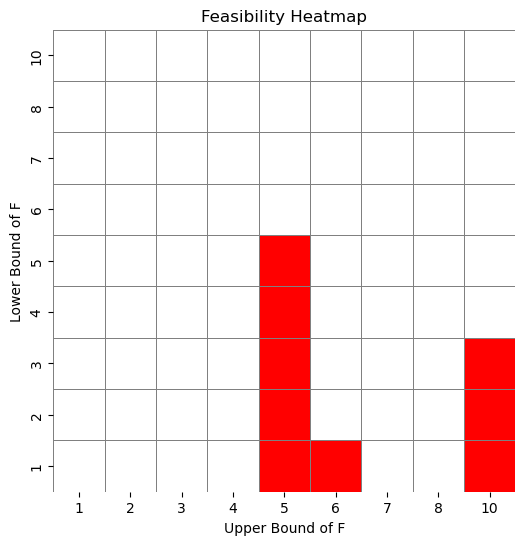

In [6]:

for n in [3, 5, 9]:
    print(f"\n▶️ 热图展示：n = {n}")
    values, masses = MarketGenerator.uniform(n=n, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix)


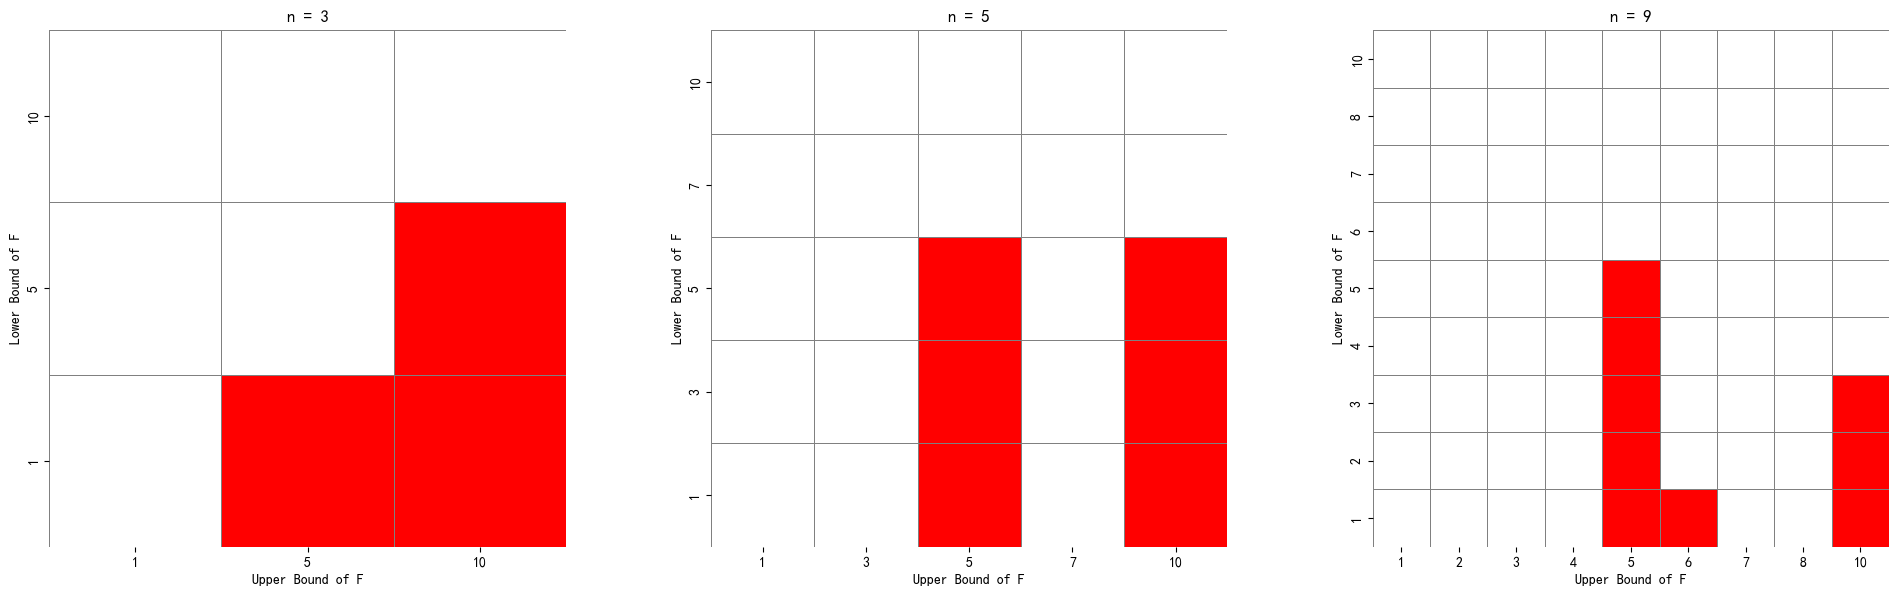

In [10]:
import matplotlib.pyplot as plt
# 创建一个含有3个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, n in enumerate([3, 5, 9]):
    values, masses = MarketGenerator.uniform(n=n, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    plot_feasibility_heatmap(values, matrix, title=f"n = {n}", ax=axes[i])

plt.tight_layout()
plt.show()

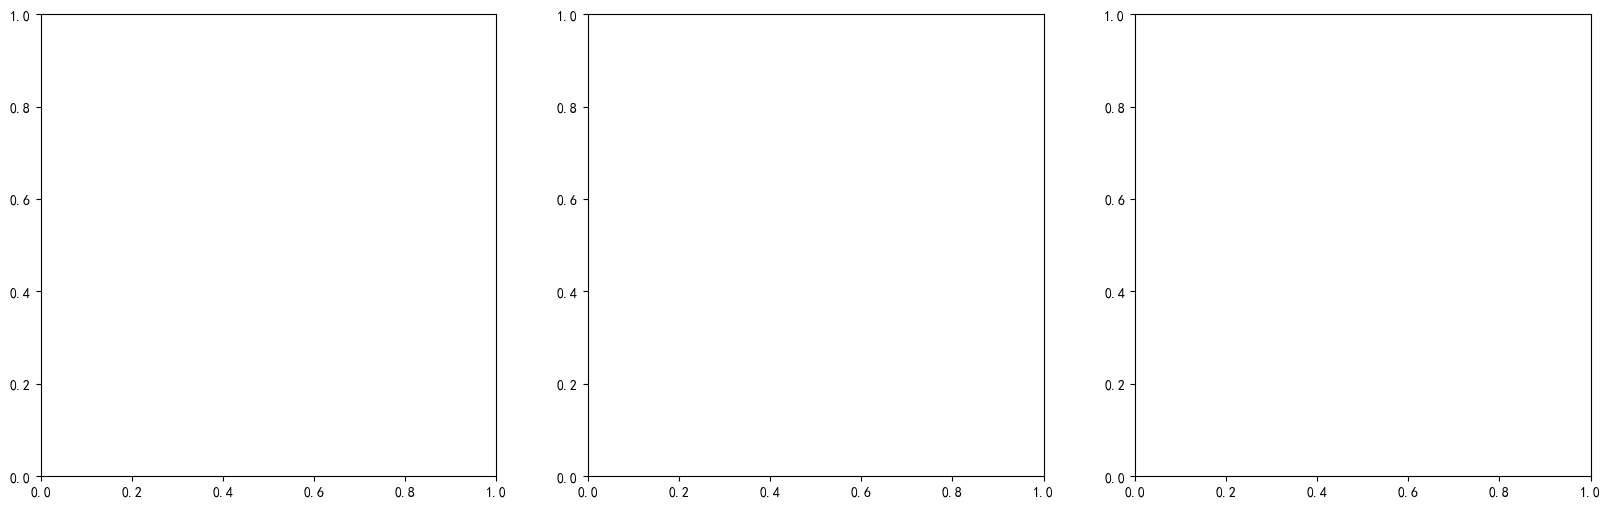

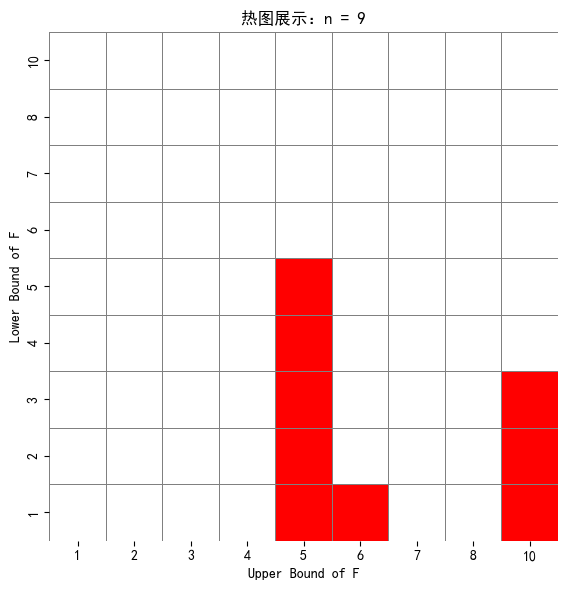

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.font_manager as fm

# 设置全局字体为支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 创建一个含有3个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, n in enumerate([3, 5, 9]):
    values, masses = MarketGenerator.uniform(n=n, low=1, high=10)
    market = Market(values, masses)
    matrix = generate_feasibility_grid(market)
    
    # 使用指定的axes
    if i == 0:
        plot_feasibility_heatmap(values, matrix, title=f"热图展示：n = {n}")
    else:
        # 关闭上一个图
        plt.close()
        # 选择当前的子图
        plt.sca(axes[i])
        plot_feasibility_heatmap(values, matrix, title=f"热图展示：n = {n}")

plt.tight_layout()
plt.show()